In [1]:
### 데이터 생성하기
import pandas as pd
import numpy as np
perch_length= np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split
train_input, test_input , train_target, test_target = train_test_split(perch_length,perch_weight,test_size = 0.25,random_state = 42)
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [3]:
train_input = train_input.reshape(-1,1)
train_target = train_target.reshape(-1,1)
test_input= test_input.reshape(-1,1)
test_target = test_target.reshape(-1,1)

In [27]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input,train_target)
test_prediction = knr.predict(test_input)
print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target))

0.9746459963987609
0.9804899950518966


In [28]:
### 타깃값과 예측값 간의 오차를 확인하는 라이브러리 불러들이기
from sklearn.metrics import mean_absolute_error
### 오차값은 : 테스트 데이터에 대한 평균 절대값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
mae

35.42380952380951

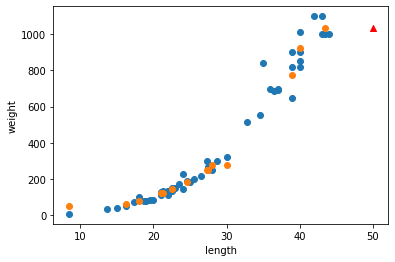

In [29]:
### 예측데이터 : 50
### - 산점도로 시각화 : 훈련데이터와 예측데이터, 이웃데이터 포함
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.scatter(test_input,test_prediction)
plt.scatter(50,knr.predict([[50]]),marker="^", c="red")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
### - 산점도로 시각화 : 훈련데이터와 예측데이터, 이웃데이터 포함
import matplotlib.pyplot as plt

In [31]:
### 이웃 데이터 추출하기
distance, indexes = knr.kneighbors([[50]])
indexes

array([[34,  8, 14]], dtype=int64)

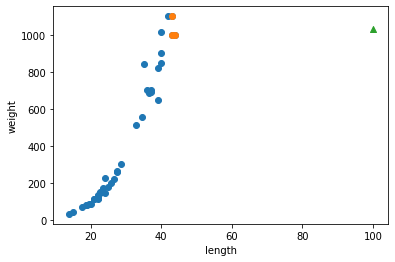

In [35]:
### 산점도 시각화하기
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes])
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter(100,1033,marker = "^")

## 선형회귀(Linear Regression)
##### - 많이 사용되는 대표적인 회귀 알고리즘
##### - 비교적 간단하고, 성능이 뒤어나기 때문에 회귀모델 수행시 초반에 주로 진행합니다.
##### - 선형회귀의 역할 : 하나의 특성을 가장 잘 나타내는 직선을 찾아내는 것이 주 역할
##### - 직선을 '추세선' 이라고 합니다.
##### - 선형회귀 알고리즘 : 1차 방정식(y= ax+b)
##### - 선형회귀 클래스(모델) : LinearRegresin
##### - 사용되는 패키지 : sklearn.linear_model